# GeoPyMC Representation Tutorial

Once we have our hdf5 database with our posteriors, we need to perform the postprocessing to analyse it. GeoPyMC contain several methods to help in this ungreatful process.

First we need to assign the class and give the name of our project:

In [2]:
import sys, os
sys.path.append("C:\Users\Miguel\workspace\pygeomod\pygeomod")
import geoPyMC
import pymc as pm
import numpy as np
import geogrid
import matplotlib.pyplot as plt
reload (geoPyMC)
%matplotlib inline

Error: could not find a compiled version of noddy at C:\Users\Miguel\Anaconda\lib\site-packages\pynoddy-0.2-py2.7.egg\pynoddy\../noddy/noddy. Please ensure the source has been compiled (using GCC and compile.bat (windows) or compile.sh (unix)).
Couldn't import dot_parser, loading of dot files will not be possible.


In [199]:
# Init
GeoPlot = geoPyMC.GeoPyMC_rep("Example plotting")

# Loading data base
GeoPlot.load_db("C:\Users\Miguel\workspace\Thesis\Thesis\PyMC_geomod\database_paper/", "graben_Graben Soft Const.hdf5", 
               verbose = 1)

The number of chains of this data base are  2


# Plotting the Model and Entropy

This plots are geomodel dependent. This means that is only posible to visualize if the database contains as trace the geomodels in form of pygeogrids!!!

In [200]:
# Extract GeoModels from database to pygeogrid objects
GeoPlot.extract_GeoMods()

### Plot 1 Lithology

C:\Users\Miguel\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
C:\Users\Miguel\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


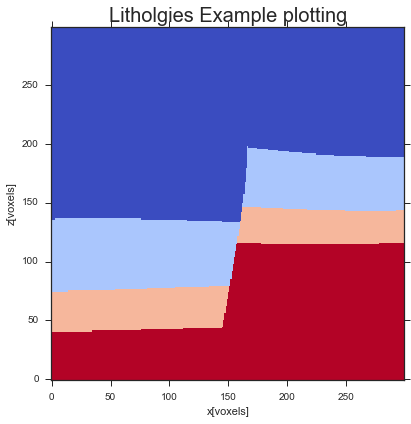

In [5]:
GeoPlot.plot_lith_sect("y",cmap = "coolwarm_r")

### Plot Multiple Lithology Section

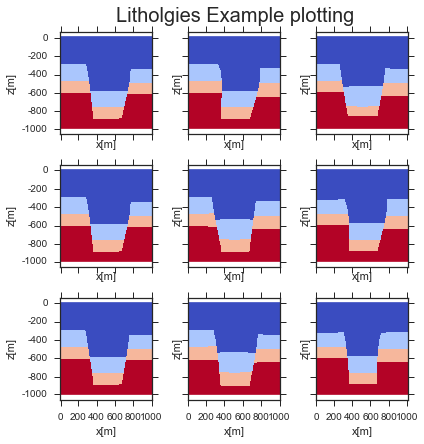

In [61]:
GeoPlot.plot_lith_sect("y", multiplots= True, cmap = "coolwarm_r", geomod_coord = True)

### Plot Gravity

In [ ]:
# The example database doesnt have geophysics simulated
GeoPlot.plot_grav_sect()

### Plot Entropy

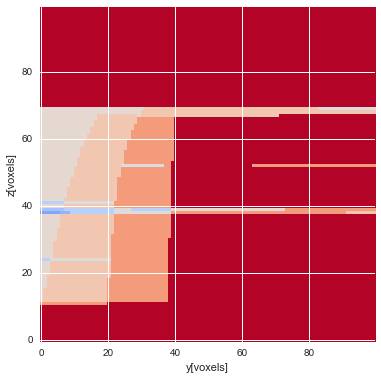

In [173]:
# Probability of each layer
GeoPlot.calculate_prob_lith()

# Layer probabily instance
GeoPlot.prob_lith

# Entropy
GeoPlot.calcualte_ie_masked()

# There are high probabilities that the colorbar sucks but the values are right
GeoPlot.ie.plot_section('x',cell_pos=3,colorbar = False, alpha = 0.8, cmap = 'coolwarm_r',
                   figsize=(6,6),interpolation= 'nearest' ,ve = 1, geomod_coord= False, contour = False, 
                   savefig = True, fig_filename = "Entropy Sandstone")

## Export vtk

In [ ]:
GeoPlot.ie.export_to_vtk("example_vtk")

#### Average entropy

In [138]:
GeoPlot.total_ie()

0.35222688808808533

## Plotting Posteriors

In [238]:
# Import priors (exported with the method export priors during the simulation)
GeoPlot.import_prior_p(path ="C:\Users\Miguel\workspace\Thesis\Thesis\PyMC_geomod\database_paper\priors.p")

# Select from the data base the variables that can be plotted
GeoPlot._select_trace()
GeoPlot._plot_traces

array(['basement_centre', 'basement_left', 'basement_right',
       'fault_left_base', 'fault_left_ori_a', 'fault_left_ori_d',
       'fault_left_top', 'fault_right_base', 'fault_right_ori_a',
       'fault_right_ori_d', 'fault_right_top', 'sedi1_centre',
       'sedi1_left', 'sedi1_right', 'sedi2_centre', 'sedi2_left',
       'sedi2_right'], 
      dtype='|S63')

## 1D posteriors and prior

For the  posterior ploting we need to have loaded the priors (usually from a pickle done during the simulation process)

C:\Users\Miguel\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


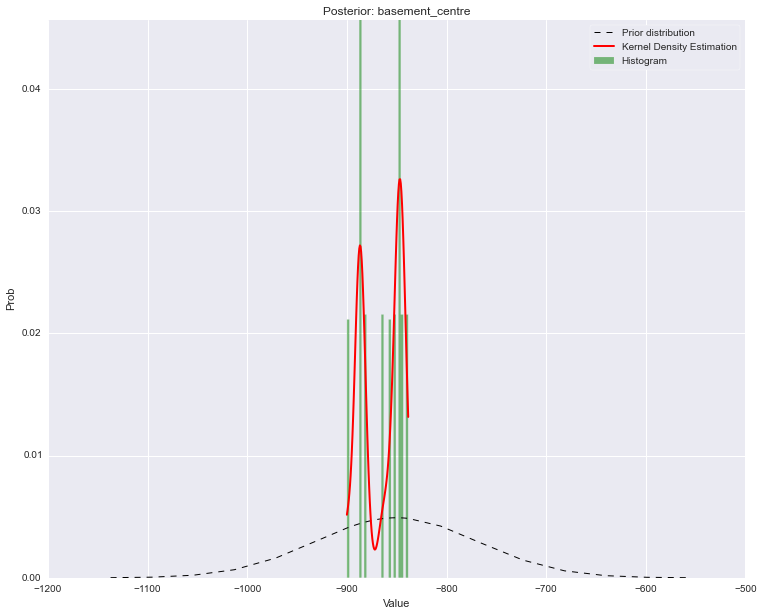

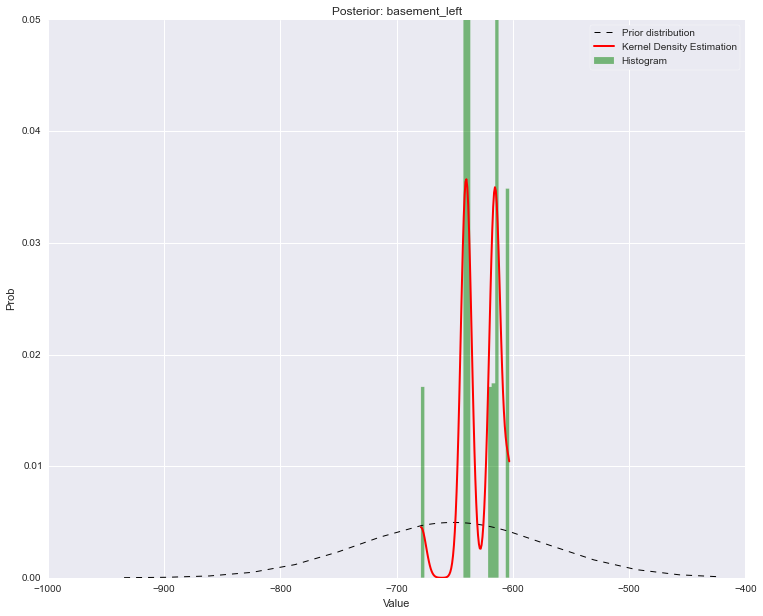

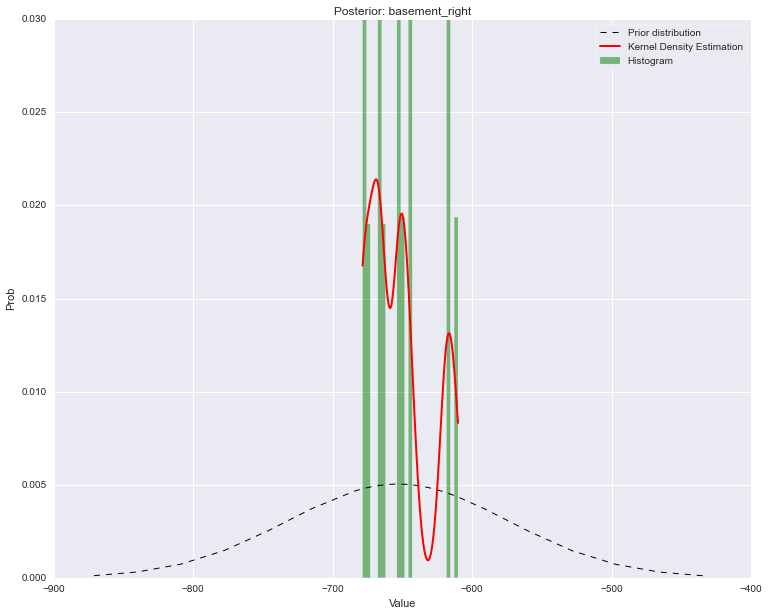

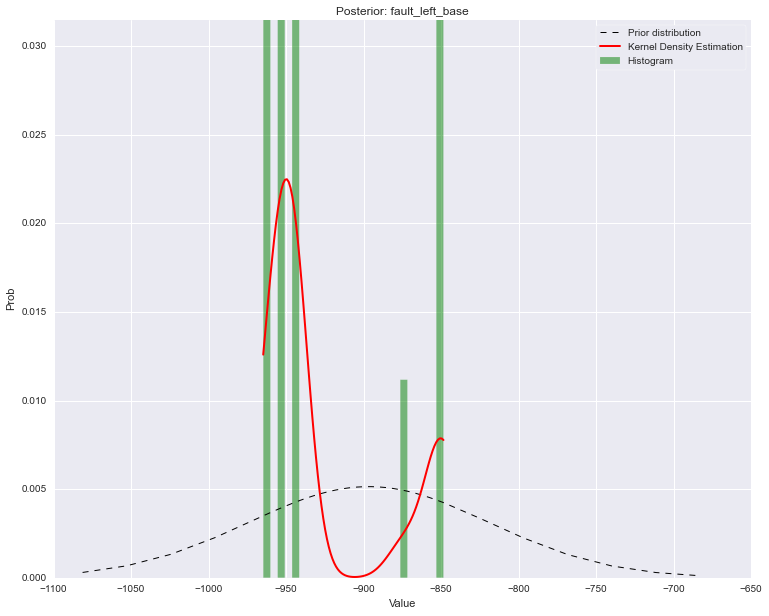

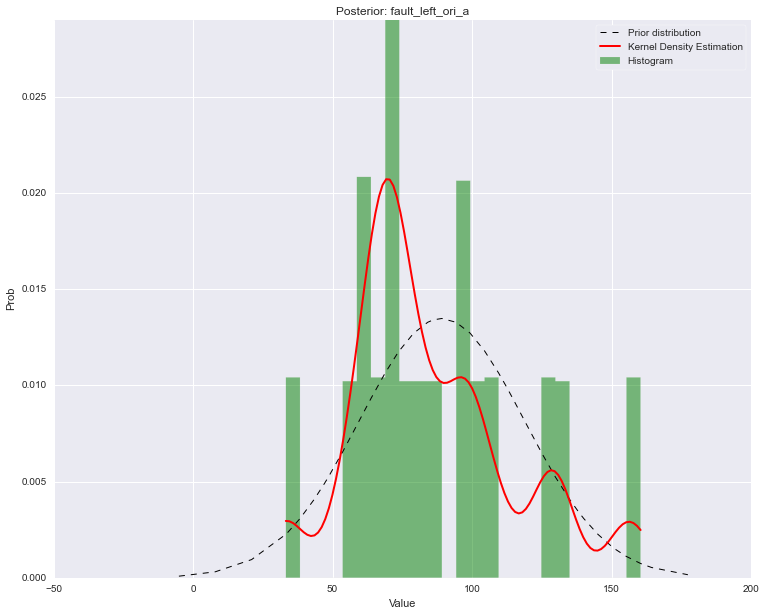

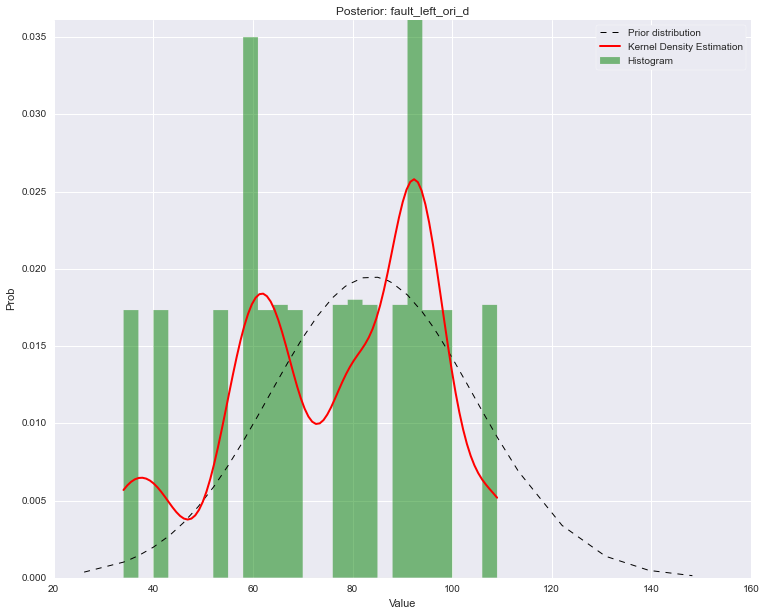

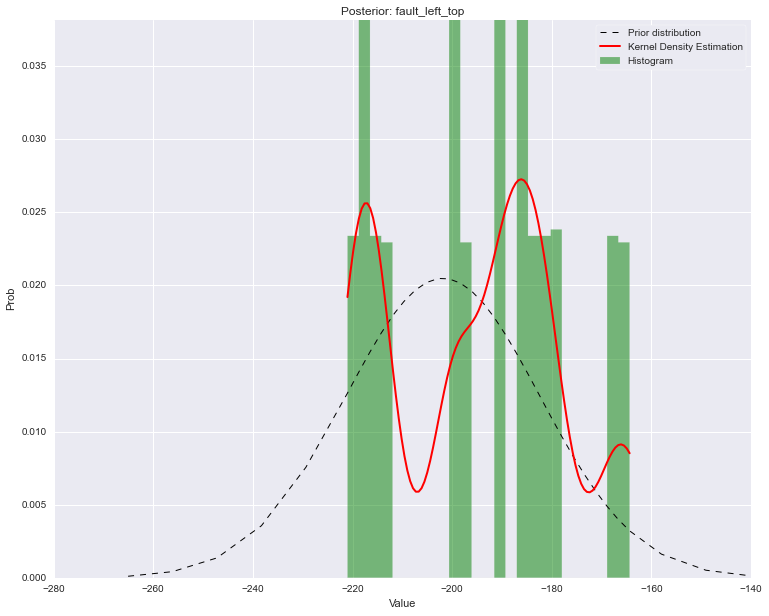

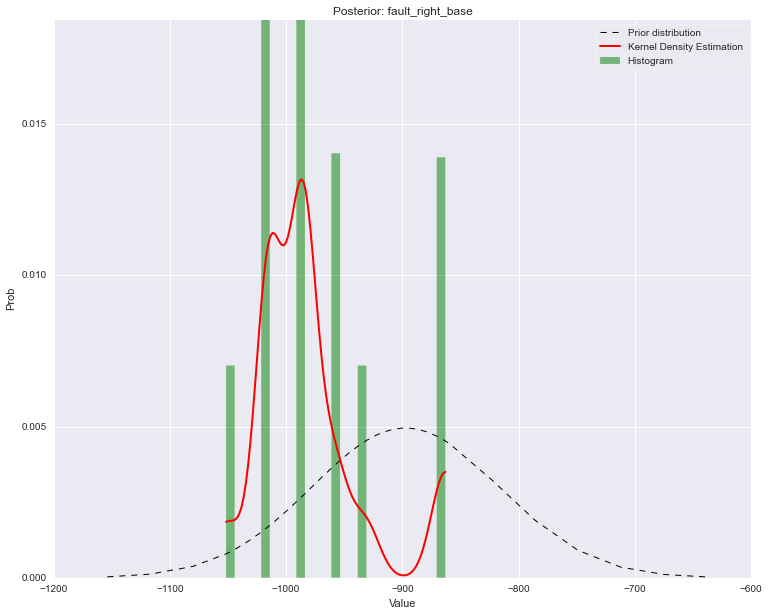

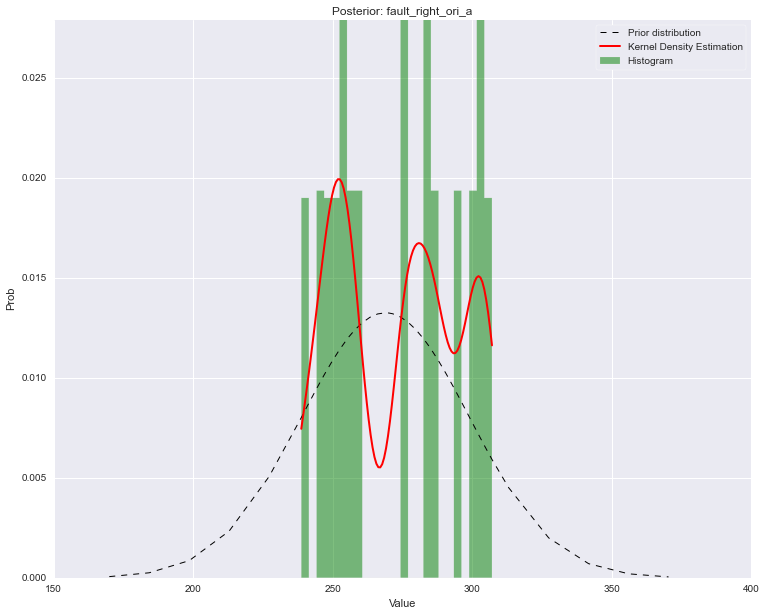

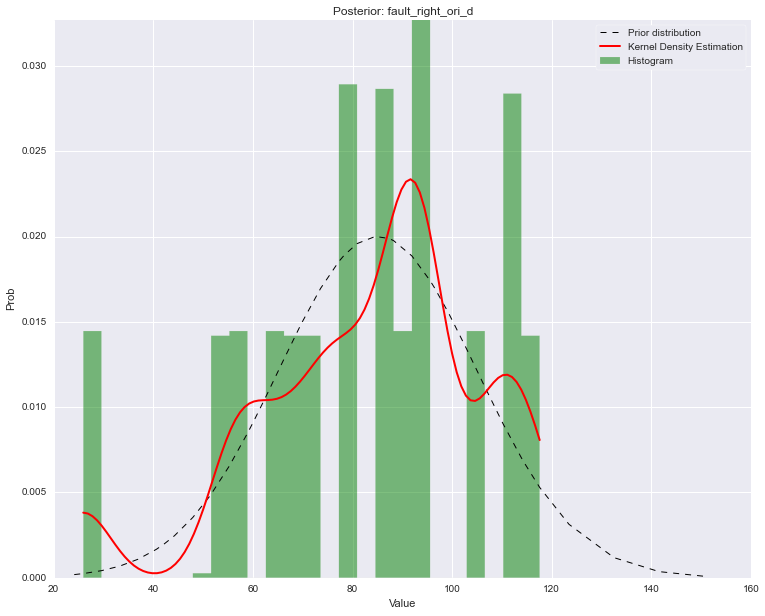

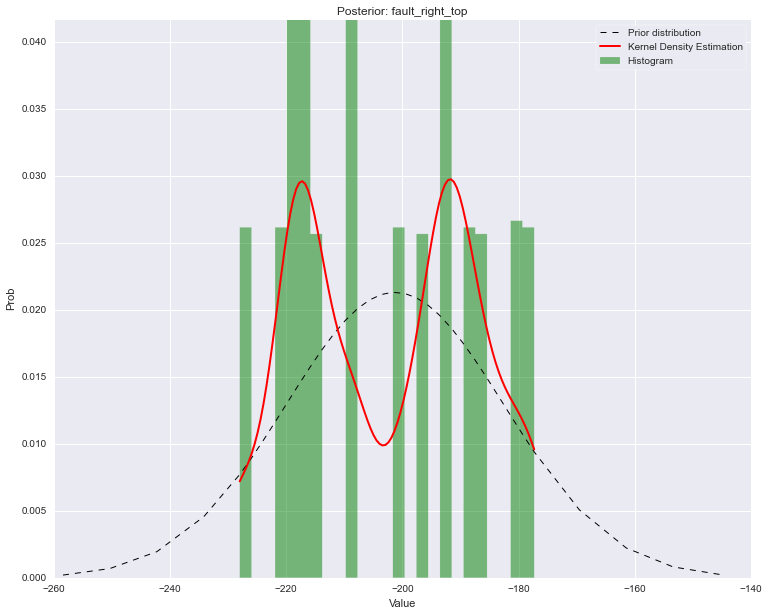

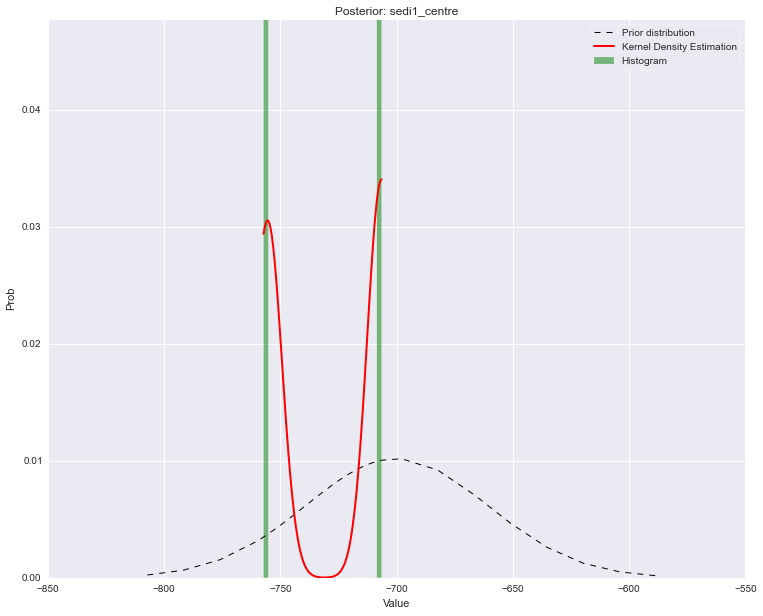

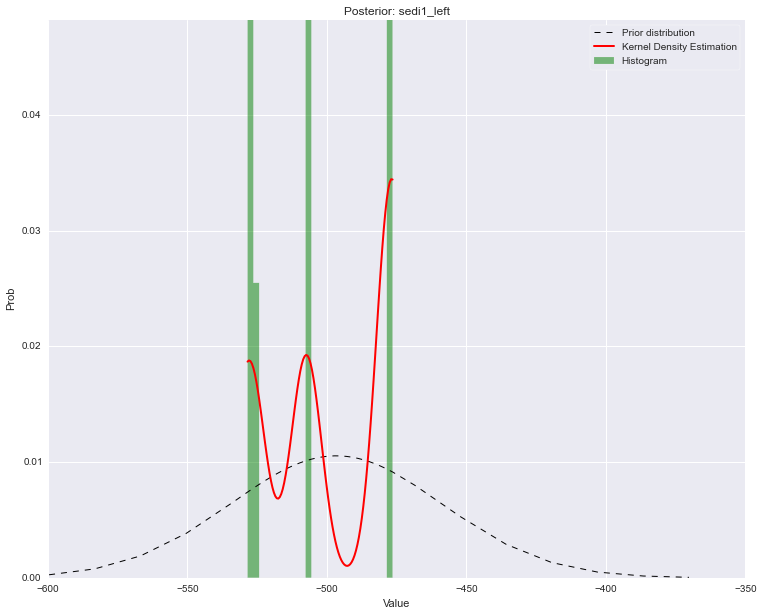

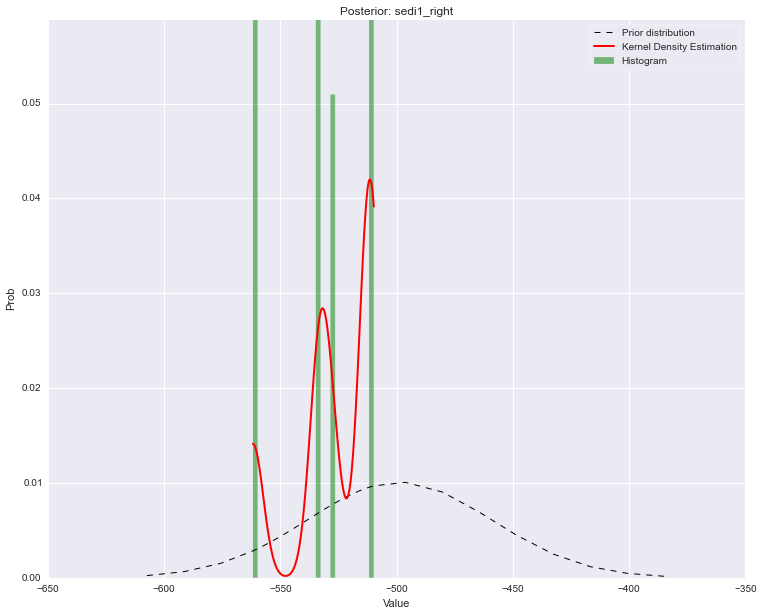

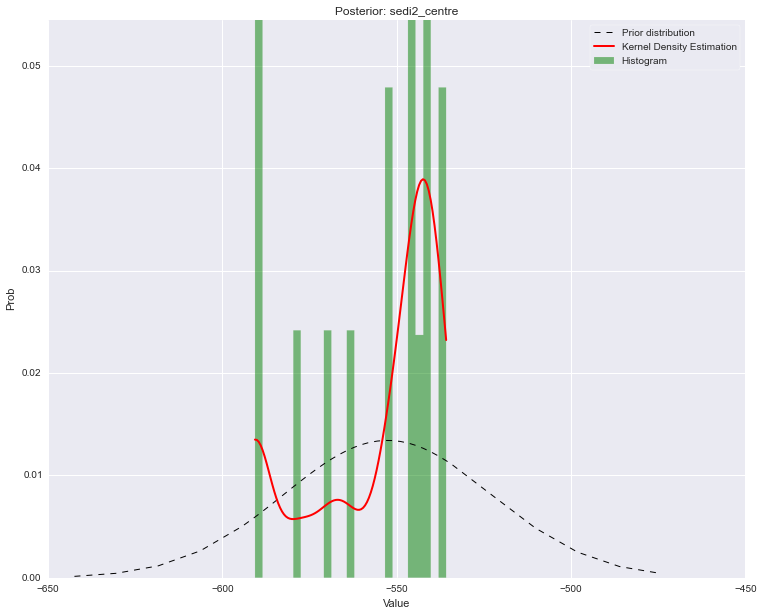

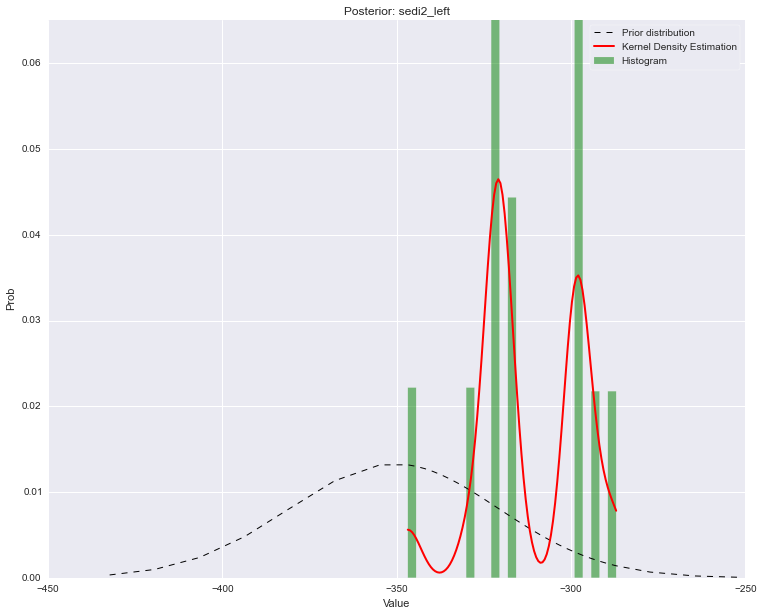

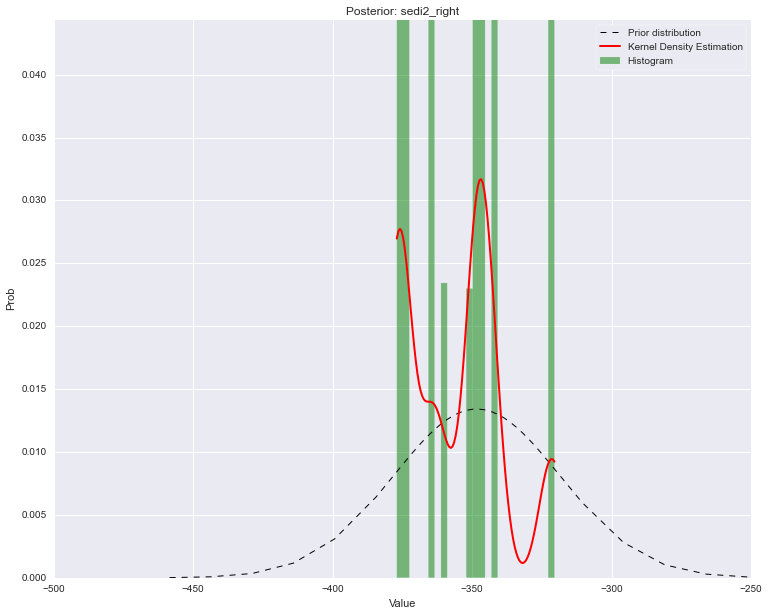

In [202]:
# Plotting posteriors and priors
GeoPlot.plot_post(burn = 0)

### Plot Joint 3D

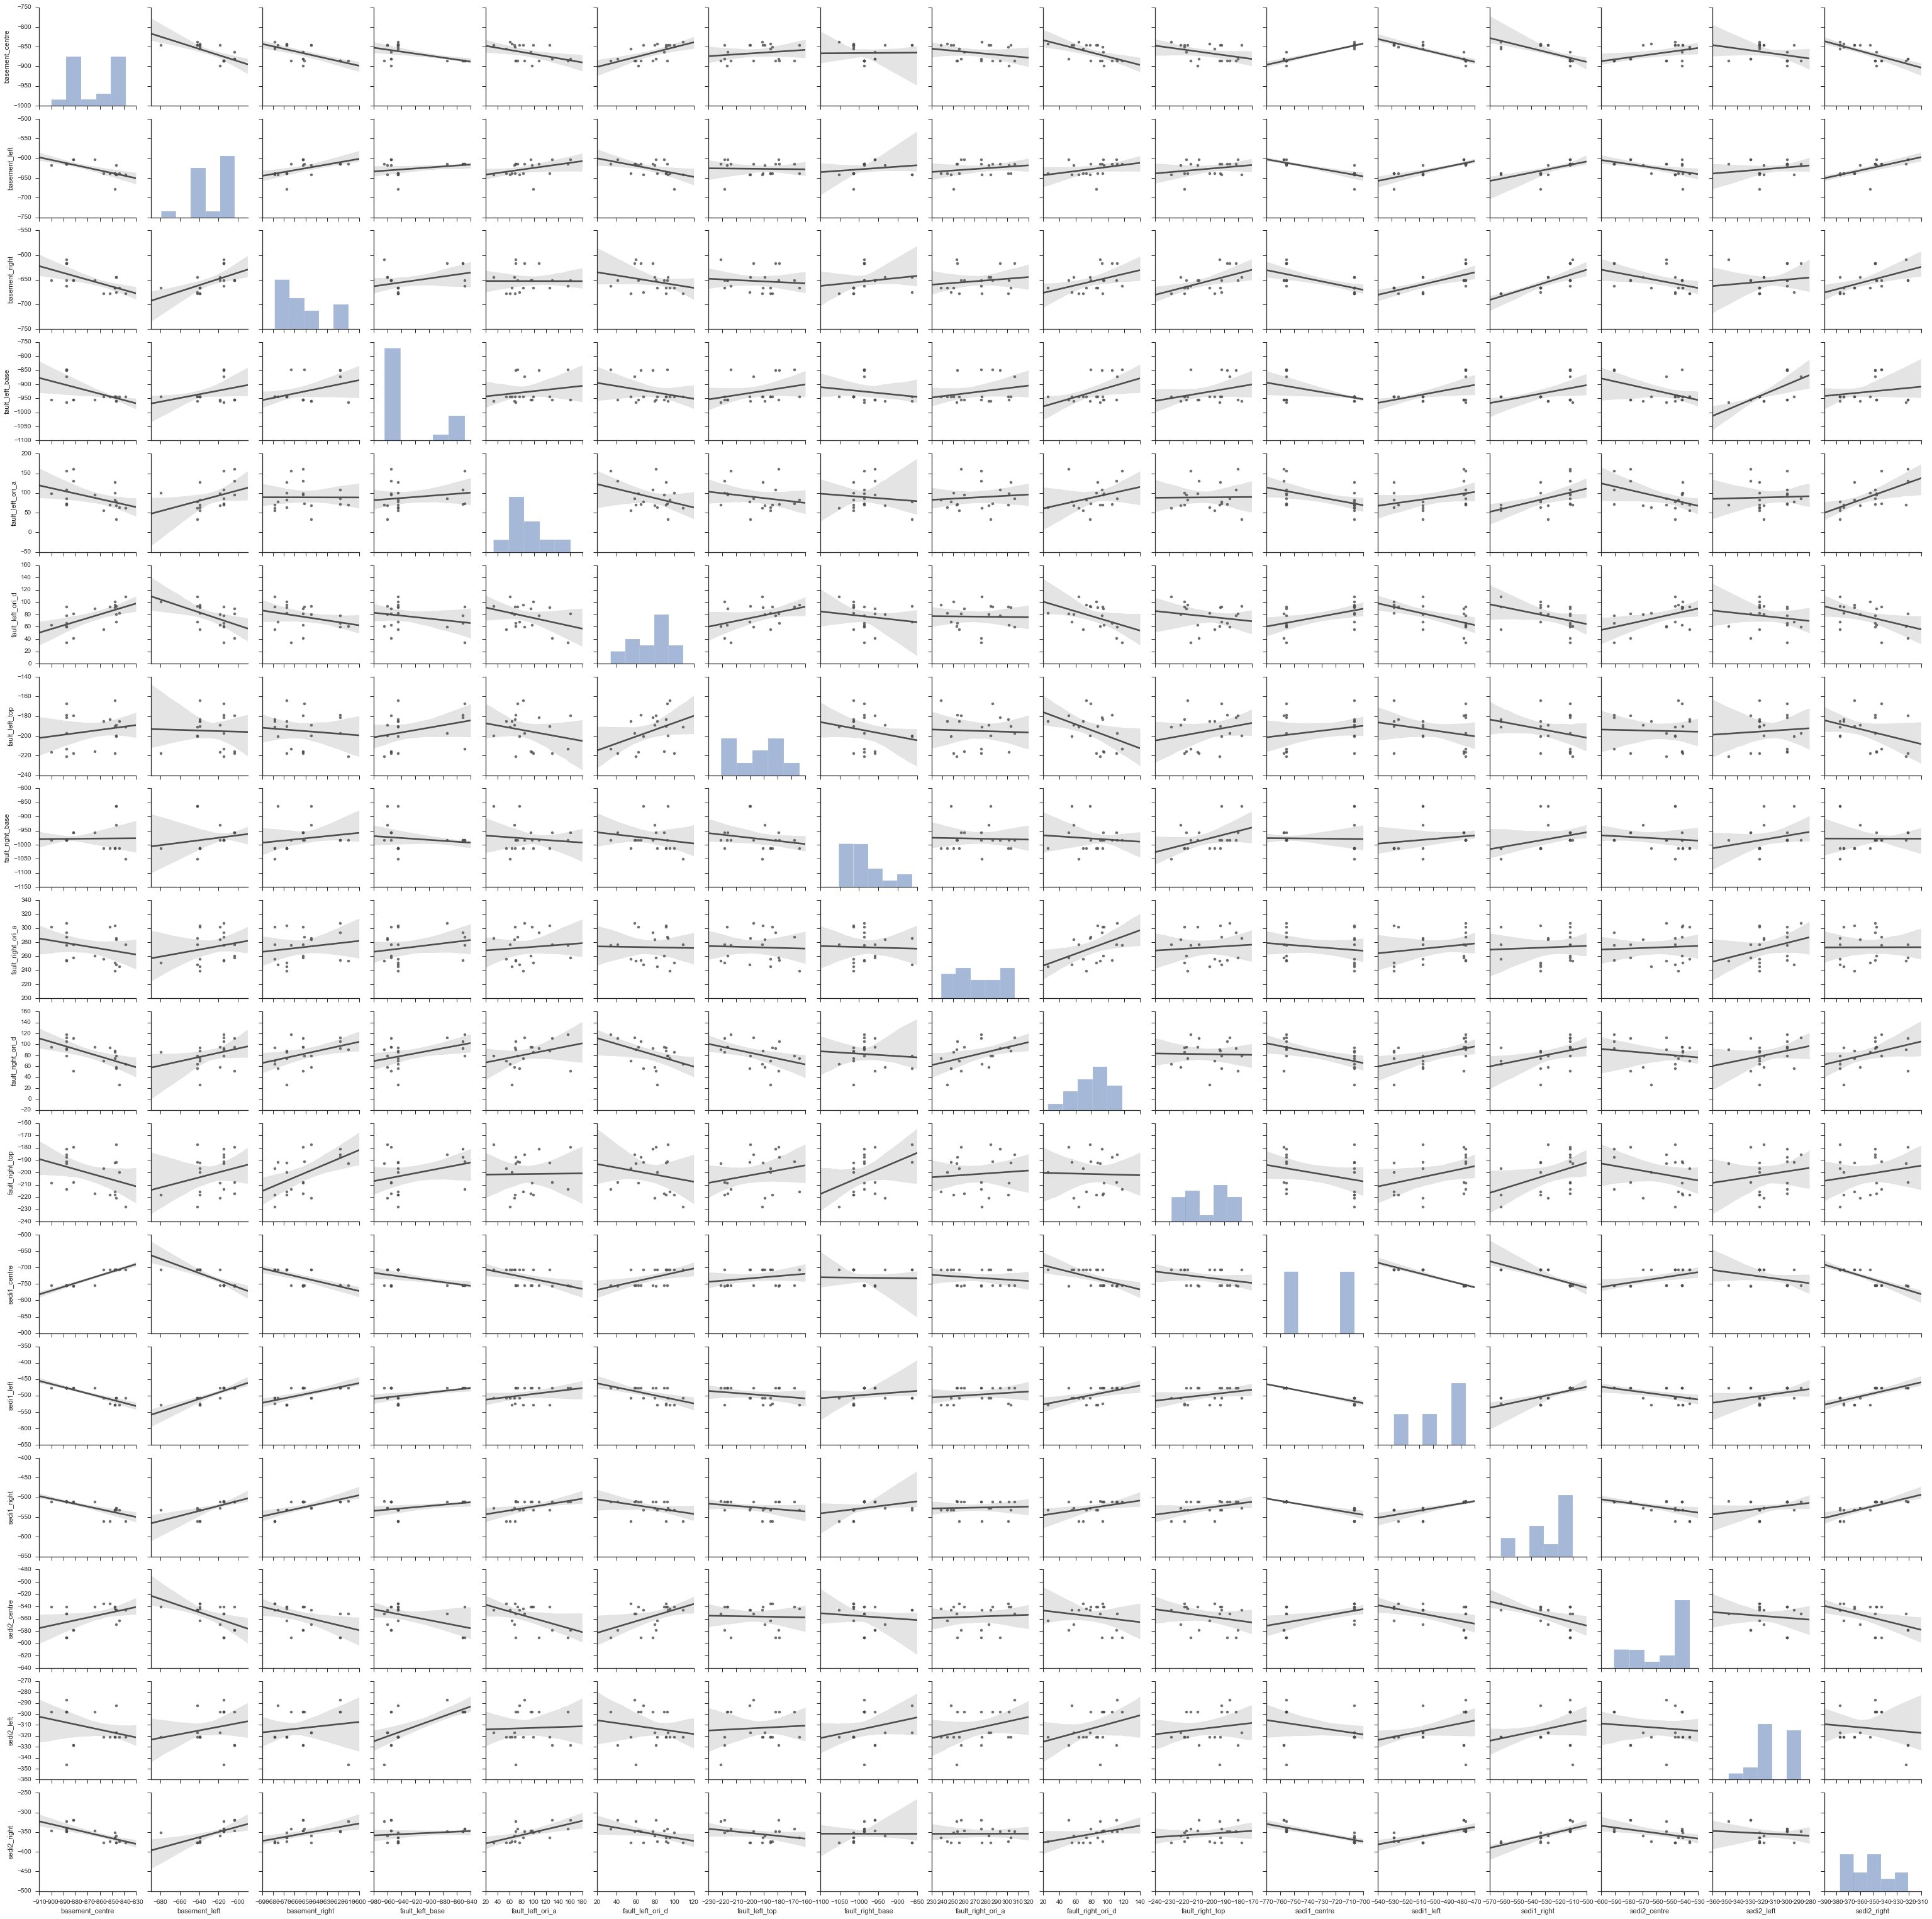

In [232]:
GeoPlot.plot_joint3D(burn = 0)

### Plot Traces

C:\Users\Miguel\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


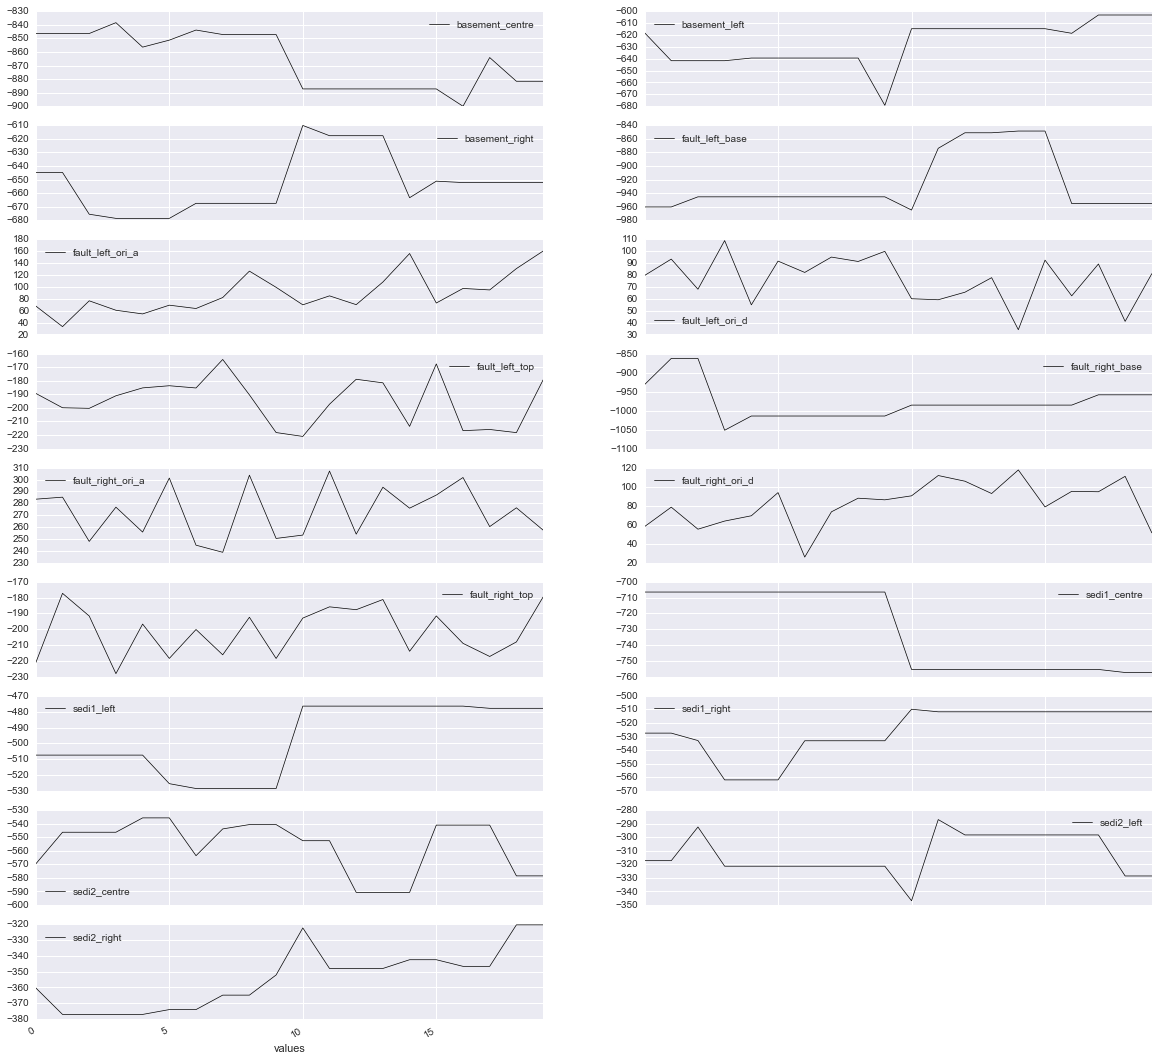

In [235]:
GeoPlot.plot_traces(burn = 0)

### Plot Geweke

In [255]:
reload (geoPyMC)
# Init
GeoPlot = geoPyMC.GeoPyMC_rep("Example plotting")

# Loading data base
GeoPlot.load_db("C:\Users\Miguel\workspace\Thesis\Thesis\PyMC_geomod\database_paper/", "graben_Graben Soft Const.hdf5", 
               verbose = 1)

The number of chains of this data base are  2


Alg basement_centre
basement_left
Alg basement_right
Alg fault_left_base
fault_left_ori_a
fault_left_ori_d
Alg fault_left_top
Alg fault_right_base
Alg fault_right_ori_a
Alg fault_right_ori_d
fault_right_top
Alg sedi1_centre
Alg sedi1_left
Alg sedi1_right
Alg sedi2_centre
Alg sedi2_left
Alg sedi2_right


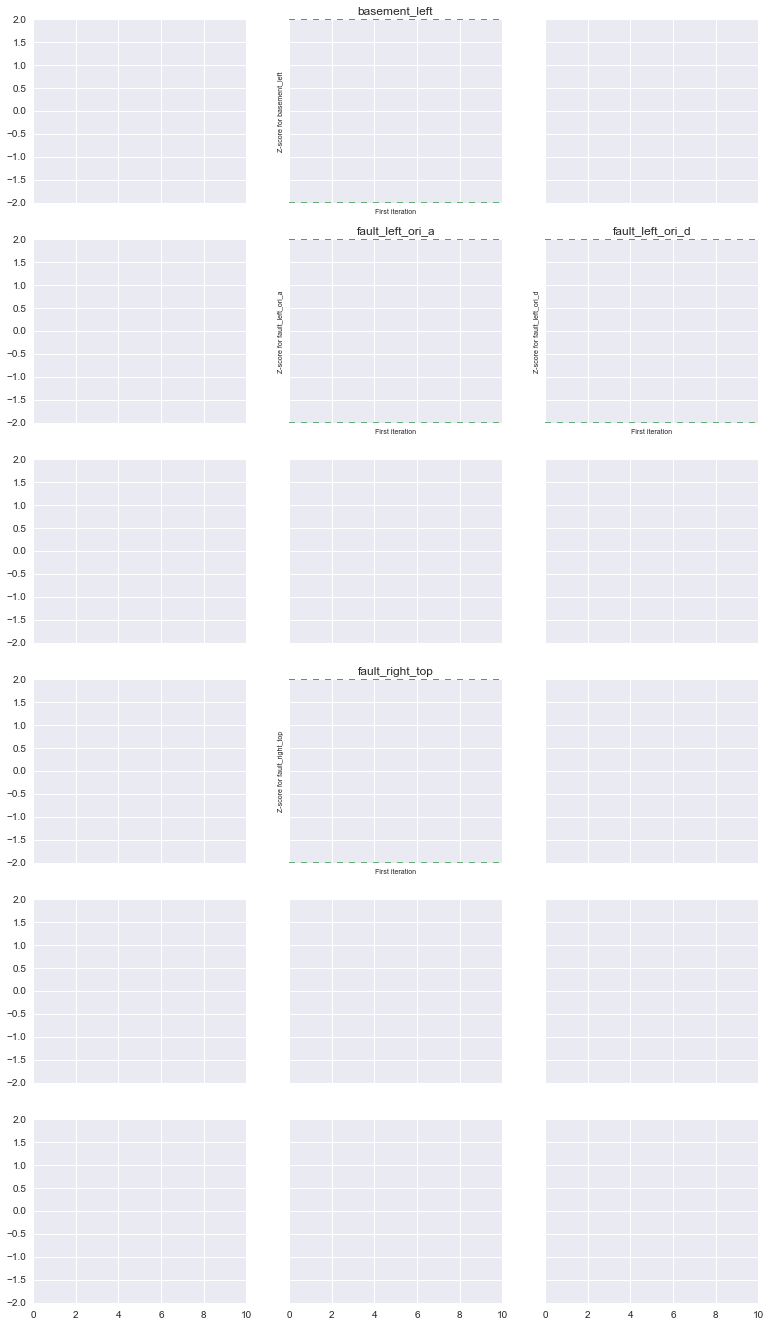

In [253]:
# I think this data base does not have enough values to calculate Geweke
GeoPlot.plot_geweke(burn = 0)

## Plot Forest

C:\Users\Miguel\Anaconda\lib\site-packages\seaborn\categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


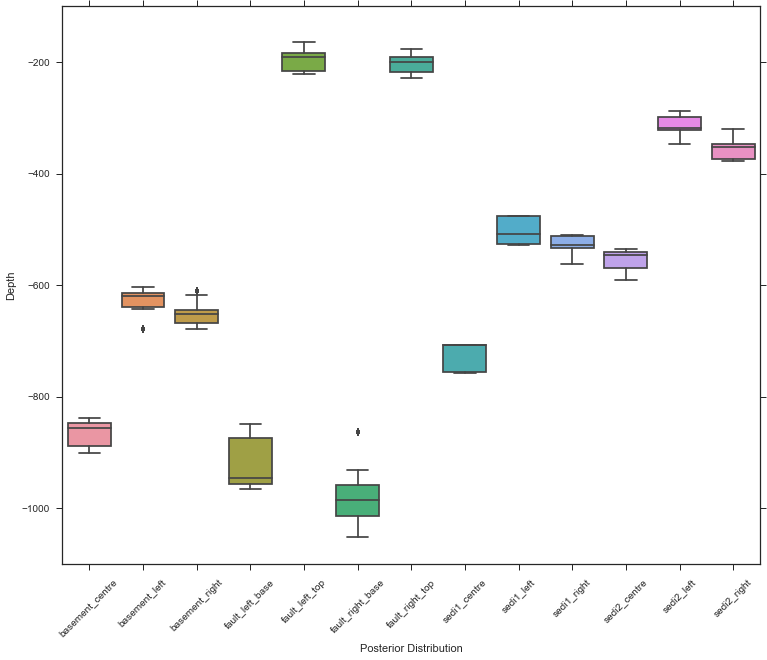

In [256]:
GeoPlot.plot_forest(burn = 0)